# 3장. 다중선형회귀(MultiRegression)

- 독립변수가 2개 이상이고 종속변수도 1개인 경우, 그들간의 관계를 선형적으로 파악하는 회귀 방식
- 독립변수들 X1, X2, X3, ..., Xn과 종속변수 Y의 관계를 Y = w0 + w1X1 + w2X2 + w3X3 + ... + wnXn 형태의 1차 함수식으로 표현
- 단순 선형 회귀에서 독립변수의 개수만 늘어난 것
- 단순 선형 회귀와 동일한 절차를 이용하여 분석을 수행
- 단, 변수의 수가 많아지므로 이로 인해 발생할 수 있는 경우들을 고려해서 적절한 조치 필요

## 독립변수들의 최초 선택
- 회귀 분석의 목적은 **종속변수를 가장 잘 설명하는 독립변수들의 성향/특징을 찾아내어** 이를 기반으로 **기존의 자료를 설명하거나 새로운 결과를 예측**하는 것
- 즉, 독립변수 일부를 임의로 누락시키는 것은 해당 모형의 설명력이 낮아지는 문제를 불러올 수 있음
- 따라서 통계(분석)적으로 회귀 분석을 수행하는 경우, 관련있는 **독립변수들을 일단 가급적 모두 고려**하는 것이 바람직

## 다중 공선성 (Multi-collinearity) 문제
- 독립변수들 간에 강한 상관 관계가 나타나는 것을 **다중공선성**이라고 한다.
- 어떤 독립변수의 값이 독립적이지 않고 다른 독립변수의 값에 의해서 결정되어 이들 간에 강한 상관 관계가 나타나는 것
- 즉, 어떤 독립변수의 값이 독립적이지 않고 다른 독립변수(들)의 값에 의해서 결정된다는 것이다.
- 독립변수들끼리의 상관 계수 R이 높으면 (아무리 설명력이 좋다고 하더라도) 회귀 모형이 유의미하다고 보기 어렵다
- 따라서 상관 계수가 높은 변수들을 삭제하거나, 주성분 분석(PCA) 기법 등을 이용하여 의존적인 성분을 제거한 뒤 회귀 분석을 수행

## 독립변수들의 설명력과 수정된 결정 계수
- 독립변수의 개수가 많아질수록 그 변수들이 종속변수에 끼치는 영향력은 늘어나게 된다. 즉, 독립변수가 많을수록 종속변수에 대한 설명력은 증가
- 따라서 다중 회귀 분석에서는 결정 계수 R2의 값이 단순회귀보다 높게 나오는 경향이 있고, 이는 독립변수의 수가 많아질수록 더욱 증가
- 이를 보완하여 수정된 결정 계수를 도입했으며, 다중 회귀에서는 일반적으로 수정 결정 계수의 값을 이용하여 분석 결과를 판단

## 수정 결정 계수 (Adjusted R2)
- **결정 계수의 값이 커지는 것을 보정하기 위해** 데이터(표본)의 크기와 독립변수의 개수를 고려하여 계산한 지표
> $ Adj\_R^2 = 1 - \frac{(1-R^2) * (N-1)}{(N-k-1)}  $  
(이 때, N은 데이터의 개수, k는 독립변수의 개수이다.)

- 수정 결정 계수의 값은 항상 결정 계수 R2보다 작거나 같은 값
- (모든 독립변수가 아니라) 종속변수에 영향을 주는 독립변수들만으로 설명되는 분산의 비율

## 데이터 선정 및 분포 정보 확인

### 보스턴 주택 가격 데이터를 불러와서 정보를 확인한다

In [1]:
import sklearn.datasets as d
boston = d.load_boston()
print(boston.DESCR)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터를 DataFrame으로 변환

In [2]:
import pandas as pd

# 특성(독립변수)들을 데이터 프레임으로 변환
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 종속변수를 덧붙인다
boston_df['PRICE'] = boston.target

# 데이터의 형태와 크기를 확인
print(boston_df.shape)

# 데이터의 일부를 확인해본다.
boston_df.head()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(506, 14)


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 컬럼 별로 종속변수와의 관계에 대한 산점도를 그린다
### 산점도와 회귀선을 바탕으로, 각 변수들의 영향을 확인

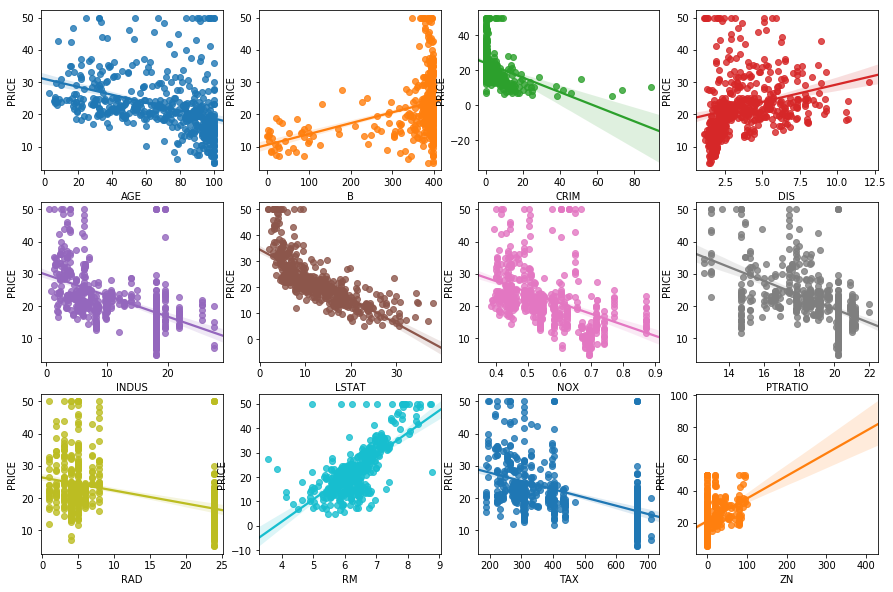

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4여의 subplot을 준비
fig,axs = plt.subplots(figsize=(15,10),nrows=3,ncols=4)

# 전체 컬럼들에서 종속변수 및 불필요한 컬럼을 뺀다
# 처음부터 마지막 전까지
features = [f for f in list(boston_df.columns)[:-1] if f != "CHAS"]
features.sort()

for i, feature in enumerate(features):
    # 현재 subplot의 행/열 번호를 갱신
    r = int(i/4)
    c = i%4
    # 산점도와 회귀선을 그린다.
    sns.regplot(x=feature,y="PRICE",data=boston_df,ax=axs[r][c])

### 컬럼 별로 독립변수들 간의 관계에 대한 플롯을 그린다
- 여기서 분포가 넓게 있는 것들은 관계없다는 것
- 분포가 좁게 되어있는것은 다중공선성이 있다는것

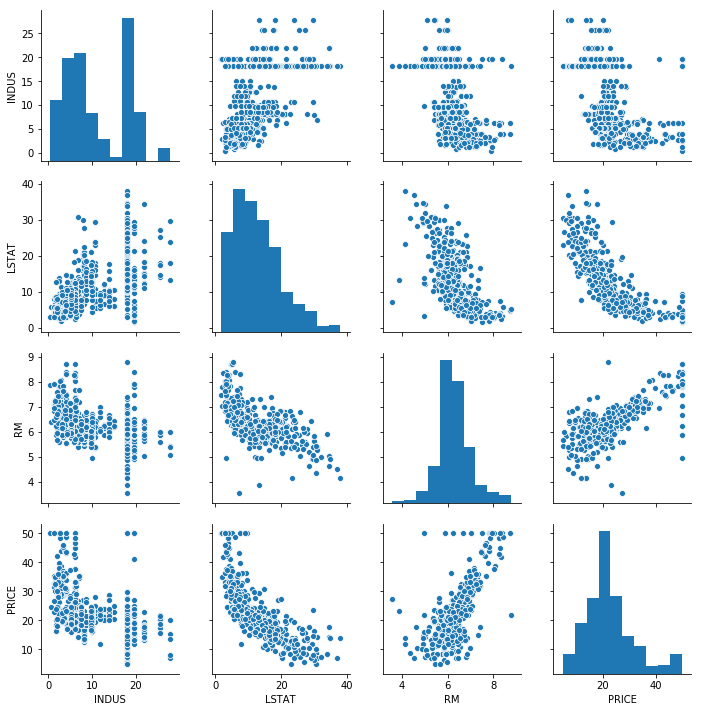

In [9]:
# 전체 컬럼들에서 상호간의 관계를 파악할 변수들을 선정
ccol = ["INDUS","LSTAT","RM","PRICE"]

# 페어플록을 그린다
sns.pairplot(boston_df[ccol])

# 또는 매개변수로 컬럼들을 직접 선택해서 그릴 수 있음
# sns.pairplot(boston_df,vars=ccol)

### 컬럼 별로 독립변수들 간의 관계에 대한 히트맵을 그린다

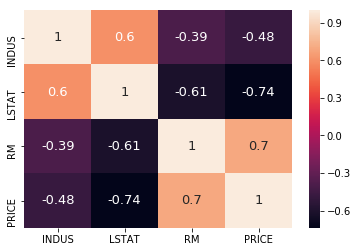

In [10]:
# 변수들 간의 상관 계수를 구한다
corrs = boston_df[ccol].corr()

# 상관 계수 값에 대한 히트맵을 그린다
# 매개변수 annot은 맵상에 값을 표시할 것인지의 여부를 지정한다
# 매개변수 annot_kws는 표시되는 값에 대한 추가 옵션이다.
sns.heatmap(corrs,annot=True,annot_kws={'size':13})

---

## 사이킷런으로 다중 선형 회귀 수행

### 데이터를 학습용과 검증용으로 분리

In [11]:
import sklearn.model_selection as ms

# 데이터 프레임에서 독립변수와 종속변수를 다시 구분
X = boston_df.drop(["PRICE"],1) # 1이면 열을 뺀다
y = boston_df["PRICE"]

# 학습용 및 검증용 데이터로 분리한다
X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state = 42)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


###  최소제곱법으로 학습, 예측, 평가를 진행

In [14]:
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

# 훈련 데이터로 학습을 수행
reg = lm.LinearRegression().fit(X_train,y_train)

# 검증 데이터로 예측을 수행
y_pred = reg.predict(X_test)

# 평가 지표 값들을 계산
mse = mt.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y_pred)

# 평가 지표 값을 출력
print("{} : {}".format("mse",mse))
print("{} : {}".format("rmse",rmse))
print("{} : {}".format("r2",r2))

mse : 21.517444231177432
rmse : 4.6386899261728445
r2 : 0.7112260057484903


### 추가로 수정 결정 계수를 계산

In [17]:
# 데이터의 크기, 즉 레코드의 갯수
n = len(X_train)

# 독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수 값을 계산
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

# 수정 결정 계수 값을 출력
print("Adjusted R2 : {:.4f}".format(adj_r2))

Adjusted R2 : 0.7002


### 회귀 계수와 절편 값을 확인

In [18]:
# ndarray의 실수값들을 부동소수점으로 출력되도록 옵션을 변경
np.set_printoptions(suppress=True)

# 회귀 계수들 적절히 반올림하여 출력
print("회귀 계수 : ",np.round(reg.coef_,3))

# 절편 값을 적절히 반올림하여 출력
print("절편 : ",round(reg.intercept_,3))

# ndarray의 실수값 출력 옵션을 원래대로 되돌린다
np.set_printoptions(suppress=False)

회귀 계수 :  [ -0.133   0.036   0.05    3.12  -15.417   4.057  -0.011  -1.386   0.243
  -0.009  -0.911   0.012  -0.547]
절편 :  31.631


### 회귀 계수를 각 독립변수 이름과 함께 정렬하여 확인

In [19]:
# 각 독립변수 이름이 인덱스가 되도록 회귀 계수를 Series로 생선
coefs = pd.Series(data=np.round(reg.coef_,3),index=X.columns)

# 생성한 Series를 값의 내림차순으로 정렬한다
coefs_sort = coefs.sort_values(ascending=False)

# 결과를 확인한다
print(coefs_sort)

RM          4.057
CHAS        3.120
RAD         0.243
INDUS       0.050
ZN          0.036
B           0.012
TAX        -0.009
AGE        -0.011
CRIM       -0.133
LSTAT      -0.547
PTRATIO    -0.911
DIS        -1.386
NOX       -15.417
dtype: float64


### 실제값과 예측값의 분포 차이를 플롯으로 표현

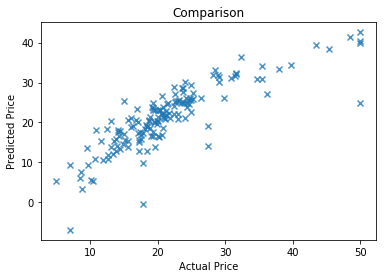

In [29]:
plt.scatter(y_test,y_pred,alpha=0.8,marker='x')
plt.title("Comparison")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## 스탯츠모델로 다중 선형 회귀 수행

### 최소제곱법으로 학습, 예측, 평가를 진행

In [31]:
import statsmodels.api as sm

# 훈련 데이터로 학습을 수행한다.
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train,X_train).fit()

# 검증 데이터로 예측을 수행한다.
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

### 수정 결정 계수, 회귀 계수, 절편 값 등을 확인

In [33]:
# 평가 지표 값들을 출력한다
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.96e-92
Time:                        15:12:35   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

## 예제 : 사이킷런 당뇨병 데이터

In [35]:
import sklearn.datasets as d

diab = d.load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [37]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [70]:
diab.data.shape

(442, 10)

In [48]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [43]:
diab_df = pd.DataFrame(diab.data,columns = diab.feature_names)
diab_df['target'] = diab.target
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


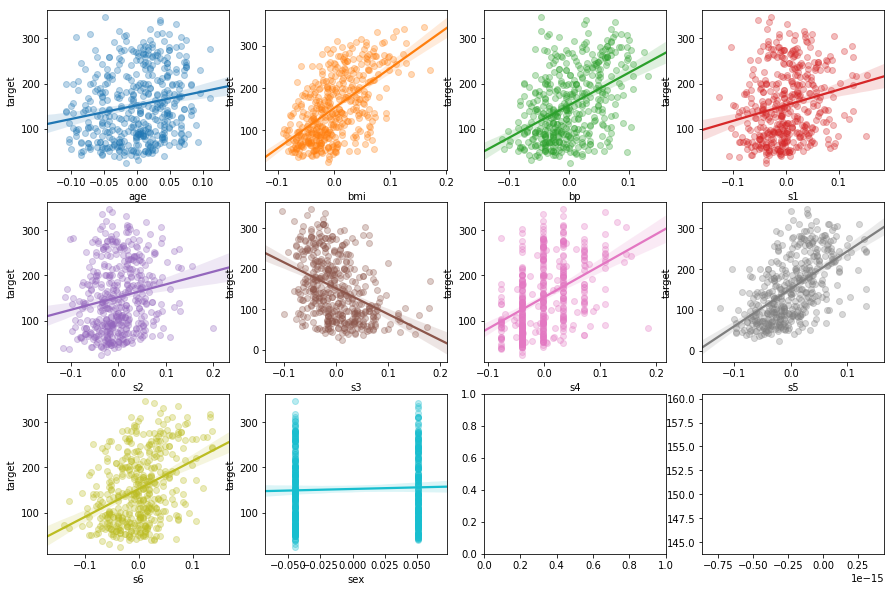

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4여의 subplot을 준비
fig,axs = plt.subplots(figsize=(15,10),nrows=3,ncols=4)

# 전체 컬럼들에서 종속변수 및 불필요한 컬럼을 뺀다
# 처음부터 마지막 전까지
features = [f for f in list(diab_df.columns)[:-1]]
features.sort()

for i, feature in enumerate(features):
    # 현재 subplot의 행/열 번호를 갱신
    r = int(i/4)
    c = i%4
    # 산점도와 회귀선을 그린다.
    sns.regplot(x=feature,
                y="target",
                data=diab_df,
                ax=axs[r][c],
                scatter_kws={'alpha':0.3})

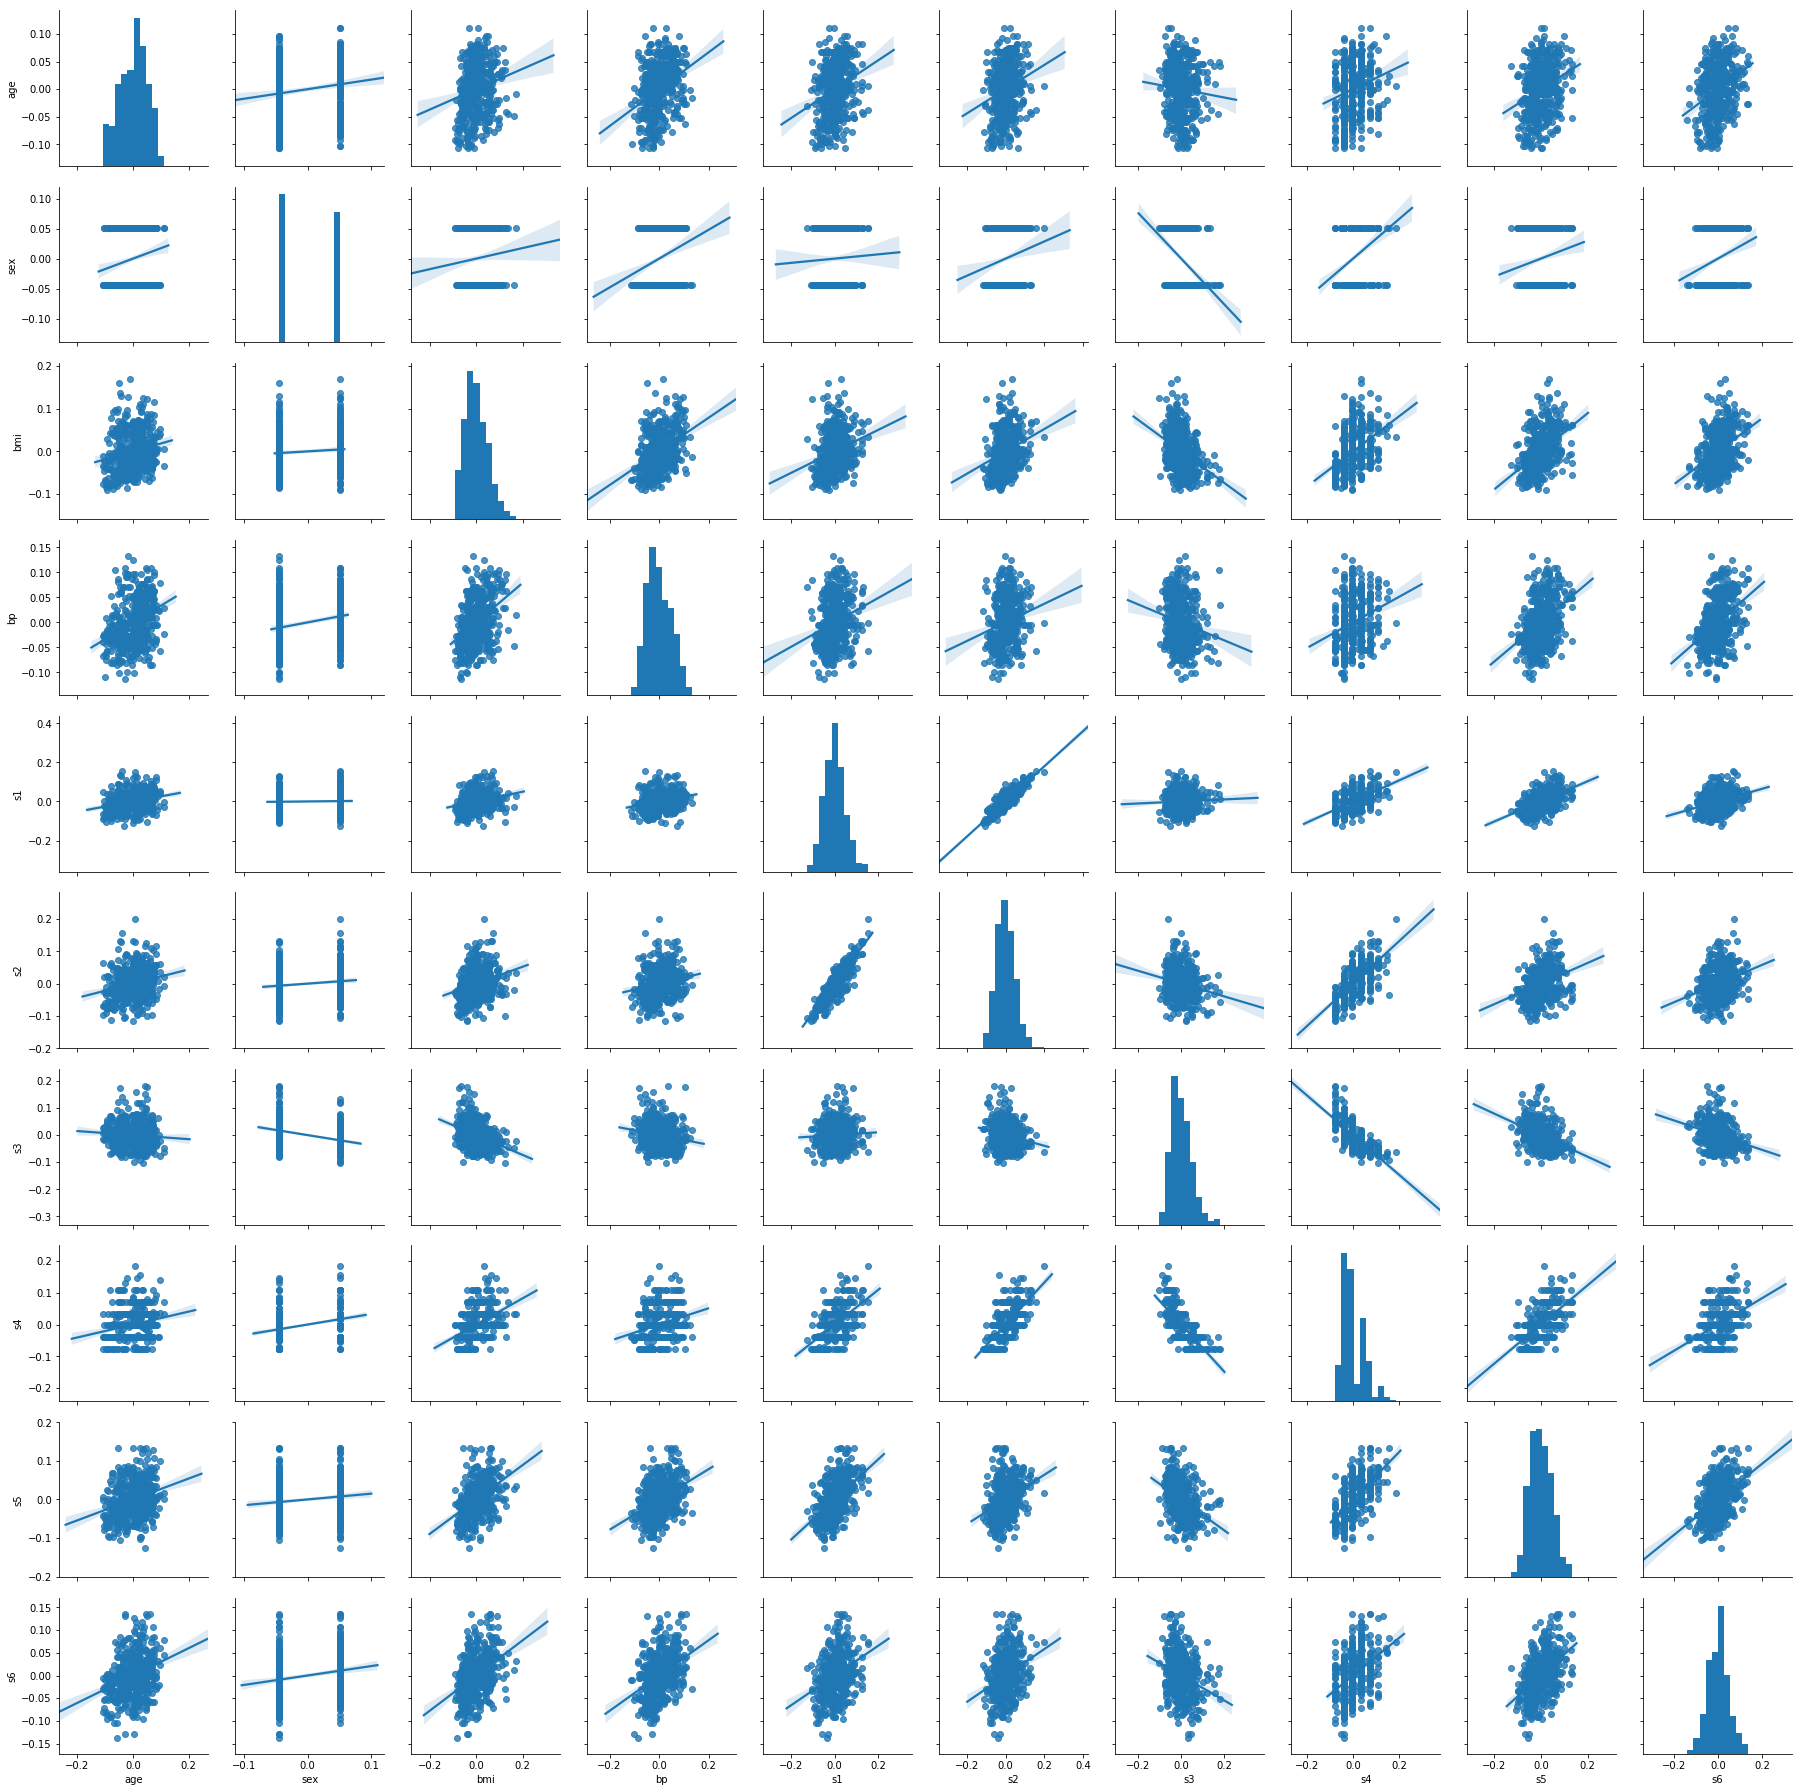

In [79]:
# 전체 컬럼들에서 상호간의 관계를 파악할 변수들을 선정
ccol = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 페어플록을 그린다
sns.pairplot(diab_df[ccol],kind="reg")

# 또는 매개변수로 컬럼들을 직접 선택해서 그릴 수 있음
# sns.pairplot(boston_df,vars=ccol)

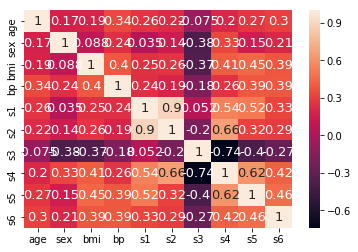

In [51]:
# 변수들 간의 상관 계수를 구한다
corrs = diab_df[ccol].corr()

# 상관 계수 값에 대한 히트맵을 그린다
# 매개변수 annot은 맵상에 값을 표시할 것인지의 여부를 지정한다
# 매개변수 annot_kws는 표시되는 값에 대한 추가 옵션이다.
sns.heatmap(corrs,annot=True,annot_kws={'size':13})

In [53]:
import sklearn.model_selection as ms

# 데이터 프레임에서 독립변수와 종속변수를 다시 구분
X = diab_df.drop(["target"],1) # 1이면 열을 뺀다
y = diab_df["target"]

# 학습용 및 검증용 데이터로 분리한다
X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state = 42)

In [54]:
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

# 훈련 데이터로 학습을 수행
reg = lm.LinearRegression().fit(X_train,y_train)

# 검증 데이터로 예측을 수행
y_pred = reg.predict(X_test)

# 평가 지표 값들을 계산
mse = mt.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y_pred)

# 평가 지표 값을 출력
print("{} : {}".format("mse",mse))
print("{} : {}".format("rmse",rmse))
print("{} : {}".format("r2",r2))

mse : 2821.7385595843757
rmse : 53.12003915269995
r2 : 0.47729201741573335


In [55]:
# 데이터의 크기, 즉 레코드의 갯수
n = len(X_train)

# 독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수 값을 계산
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

# 수정 결정 계수 값을 출력
print("Adjusted R2 : {:.4f}".format(adj_r2))

Adjusted R2 : 0.4598


In [56]:
# ndarray의 실수값들을 부동소수점으로 출력되도록 옵션을 변경
np.set_printoptions(suppress=True)

# 회귀 계수들 적절히 반올림하여 출력
print("회귀 계수 : ",np.round(reg.coef_,3))

# 절편 값을 적절히 반올림하여 출력
print("절편 : ",round(reg.intercept_,3))

# ndarray의 실수값 출력 옵션을 원래대로 되돌린다
np.set_printoptions(suppress=False)

회귀 계수 :  [  29.25  -261.708  546.297  388.401 -901.953  506.761  121.148  288.029
  659.271   41.375]
절편 :  151.008


In [57]:
# 각 독립변수 이름이 인덱스가 되도록 회귀 계수를 Series로 생선
coefs = pd.Series(data=np.round(reg.coef_,3),index=X.columns)

# 생성한 Series를 값의 내림차순으로 정렬한다
coefs_sort = coefs.sort_values(ascending=False)

# 결과를 확인한다
print(coefs_sort)

s5     659.271
bmi    546.297
s2     506.761
bp     388.401
s4     288.029
s3     121.148
s6      41.375
age     29.250
sex   -261.708
s1    -901.953
dtype: float64


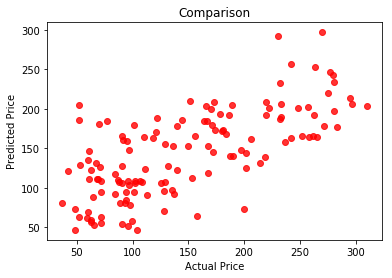

In [69]:
plt.scatter(y_test,y_pred,alpha=0.8,marker='o',color='red')
plt.title("Comparison")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()